# 🚀 Objective: Gradient boosting  Regression Implementation
# 💡 Own Code: Python Implementation for Digesting Concept
# 🎯 Purpose: Mastering the Essence of Gradient Boosting

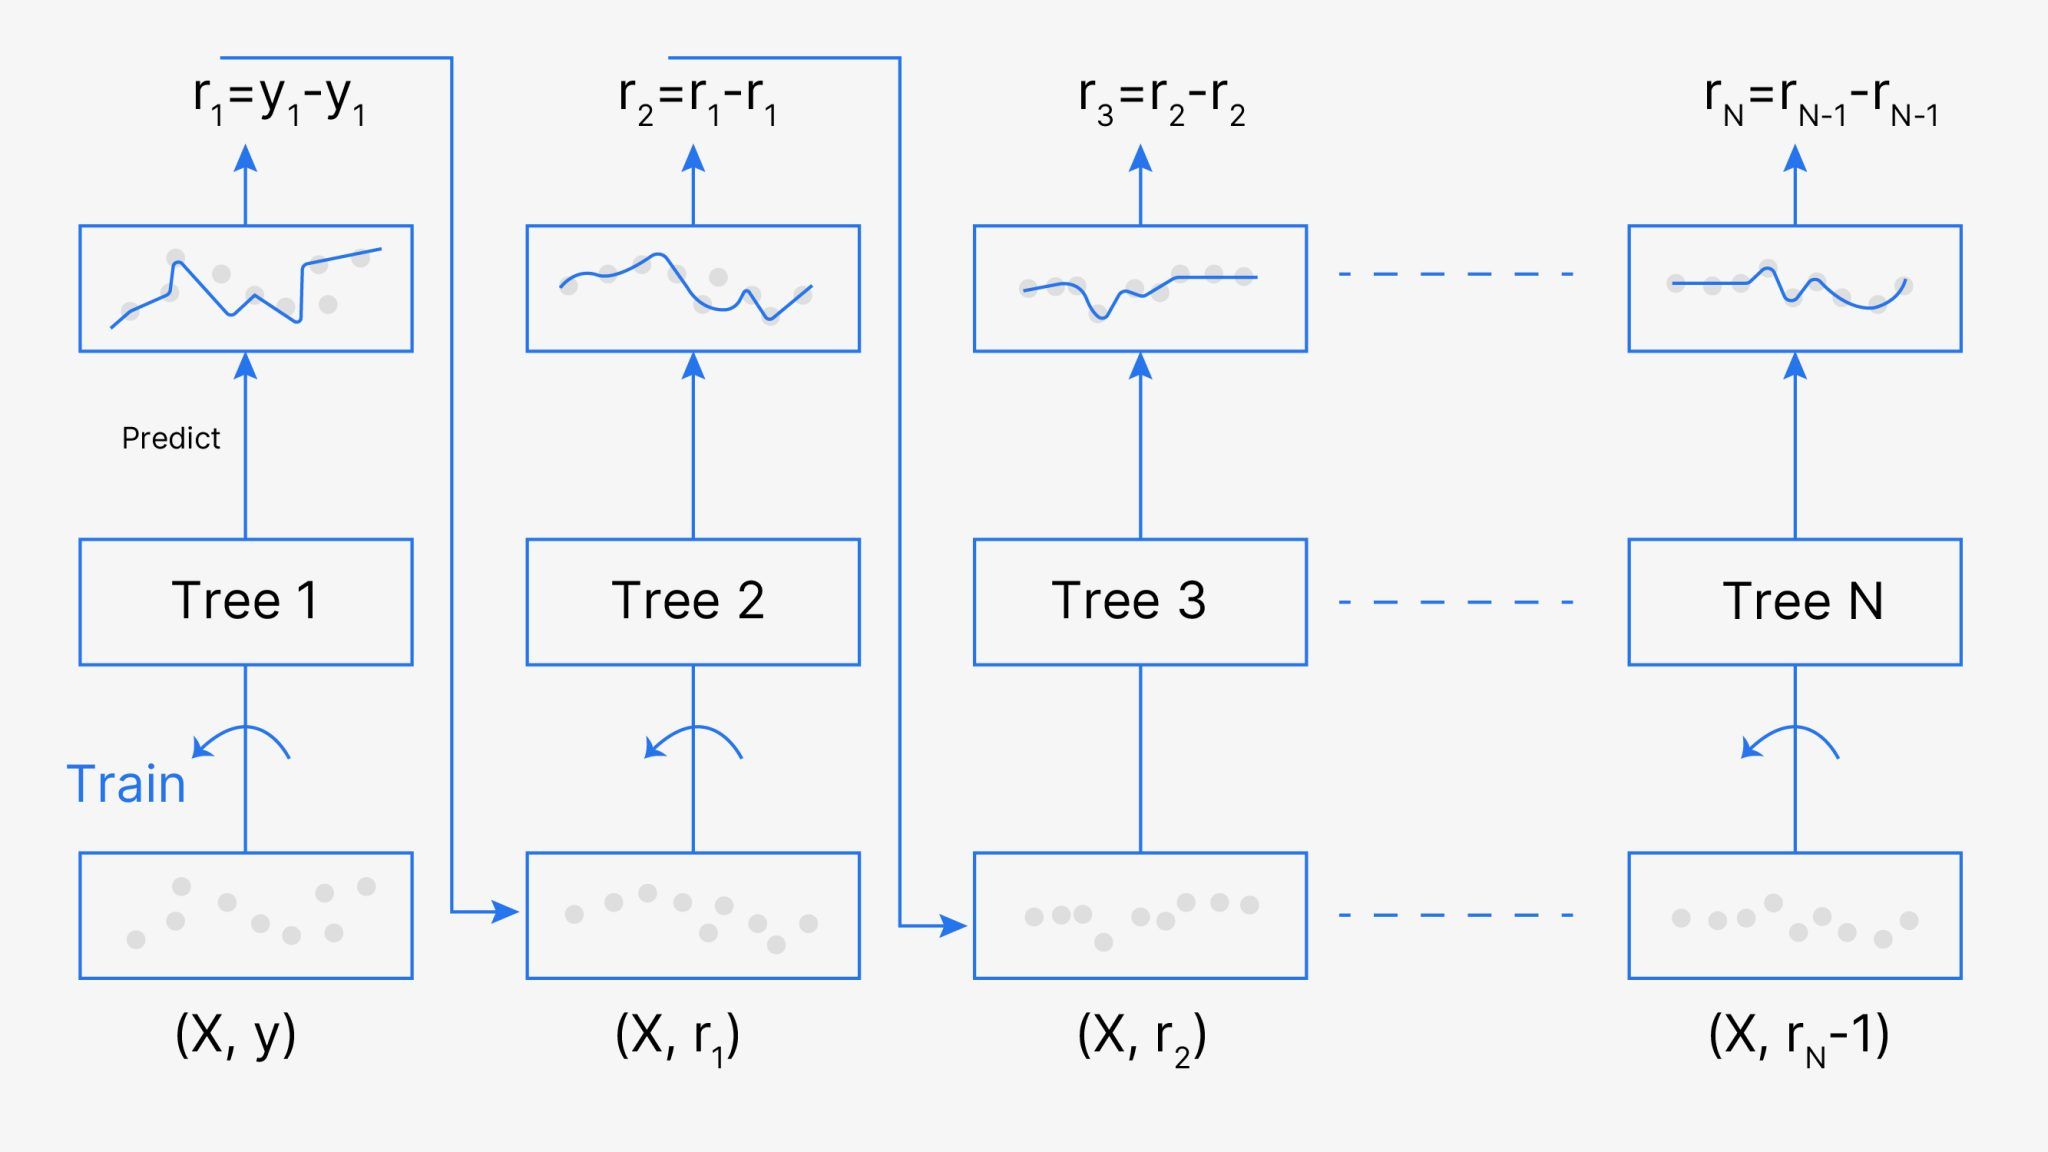

# Gradient Boosting
- Spl Thanks(Credits)
- https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/

- Gradient boosting is a machine learning ensemble technique that combines the predictions of multiple weak learners, typically decision trees, sequentially.

# 1 . Import Python Modules

In [4]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# 2. Implement - Gradient-Boosting -Regression

In [2]:
def gradient_regression_model(X,Y,n_estimators, alpha=0.1):
    
    # Create a decision tree regressor with a maximum depth of 1
    predicted_values = np.full_like(Y, np.mean(Y))
    
    #print("Base Predicted Values:", predicted_values)
    error_values = np.array(Y - np.mean(Y))
    #print("Base Errors",error_values)

    for i in range(n_estimators):

        tree_reg = DecisionTreeRegressor(max_depth=1)
        tree_reg.fit(X, error_values)

        # Find the average target value in each leaf node
        # Leaf nodes can be found using the tree's `apply` method
        leaf_nodes = tree_reg.apply(X)

        leaf_values = {}
        for node in set(leaf_nodes):
            leaf_values[node] = error_values[leaf_nodes == node].mean()

        # Create a target column based on the average target value of the leaf node
        target_column = np.array([leaf_values[node] for node in leaf_nodes])

        # Print the target column
        #print("Target Column Based on Leaf Node Avg:")
        #print(target_column)
        predicted_values=predicted_values+alpha*(target_column)
        #print("Base -Predicted:", predicted_values)
        error_values = np.array(Y - predicted_values)



    # Final Predicted Values
    print("Predicted Values",predicted_values)
    # test set RMSE
    test_rmse = mean_squared_error(Y, predicted_values) ** (1 / 2)

    # Print rmse
    print('Root mean Square error: {:.2f}'.format(test_rmse))     



# 3. Invoke - Call - Gradient- Boosting - Regression

In [3]:
# Create a dictionary containing the data
data = {
    'Years of Exp': [1, 1.5, 2.5, 3, 5, 6],
    'Gap': [0, 1, 1, 0, 0, 0],
    'Annual salary': [4, 4, 5.5, 7, 7.5, 8]
}
# Create a pandas DataFrame from the dictionary
df = pd.DataFrame(data)

X=df.drop('Annual salary',axis=1)
Y=df["Annual salary"]
print("Actual Values",Y.to_list())
gradient_regression_model(X,Y,n_estimators=50,alpha=0.1)

Actual Values [4.0, 4.0, 5.5, 7.0, 7.5, 8.0]
Predicted Values [4.05086489 4.05086489 5.50710183 6.99371707 7.48111298 7.91633835]
Root mean Square error: 0.05
